<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E5%9F%BA%E6%9C%ACpackage/README.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**需要安裝的套件**

`$ pip install jupyter numpy scipy matplotlib ipython scikit-learn pandas  mglearn`

mglean可以下載資料夾後,放至工作資料夾內


In [ ]:
! pip install jupyter numpy scipy matplotlib ipython scikit-learn pandas  mglearn

# 學習機器學習時,必需要會一些基本套件的操作方法
- numpy
- pandas
- matplotlib
- scipy
- scikit-learn
- mglearn


In [2]:
#numpy
import numpy as np
x = np.array([[1, 2, 3],[4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


- 稀疏矩陣是指大部分元素為0的矩陣。
- 轉成稀疏矩陣可以節省記憶體空間與運算時間，特別適合處理大量零元素的資料，如機器學習中的特徵矩陣或圖論中的鄰接矩陣。

In [3]:
#scipy
from scipy import sparse

eye = np.eye(4)
print("numpy array:\n{}".format(eye))

#轉換為稀疏矩陣
sparse_matrix = sparse.csr_matrix(eye)
print("\nScipy sparse CSR matrix:\n{}".format(sparse_matrix))

numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Scipy sparse CSR matrix:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [4]:
#使用COO格式建立(coordinate format)
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data,(row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
<COOrdinate sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


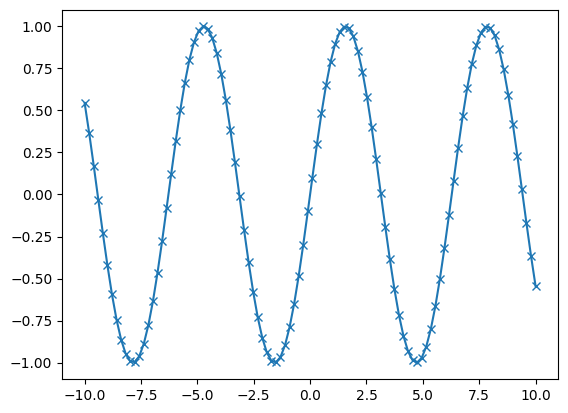

In [5]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker="x")

In [6]:
## pandas
import pandas as pd

data ={
    'Name':["John", "Anna", "Peter", "Linda"],
    "Location":["New York", "Paris", "Berlin", "London"],
    "Age":[24, 13, 53, 33]
}

data_pandas = pd.DataFrame(data)
display(data_pandas)

#選擇大於30歲的
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


## 第一個應用程式:分類Iris(鳶尾屬的花)的種類
![](https://cbdm-01.zdv.uni-mainz.de/~galanisl/danalysis/images/iris_flower.png)

- 因為我們有測量數據，知道鳶尾花的正確品種，所以這是監督學習(supervised learning)問題。  
- 我們想要預測以下3個種類(classes)中的一個選項(鳶尾花的種類),這是分類(classification)
- 特定的數據資料，它所屬的物種稱為它的標籤(label)。
- 透過數據資料,預測分類(classification)出的種類

### 1. 取得資料
- scikit-learn內建的資料

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris_dataset = load_iris()
#print(iris_dataset['DESCR']) #有150筆資料,3個種類的鳶尾屬的花,每一種有50筆資料


In [8]:
#iris_dataset提供的key
print("iris_dataset提供的key有:\n{}".format(iris_dataset.keys()))

iris_dataset提供的key有:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
#DESCR是描述資料
print(iris_dataset['DESCR'][:193] + '\n...') #有150筆資料,3個種類的鳶尾屬的花,每一種有50筆資料,每1筆資料有4個屬性(測量的數據)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [10]:
#target_names是想要預測的iris的種類(3個)
print("預測種類: {}".format(iris_dataset['target_names']))

預測種類: ['setosa' 'versicolor' 'virginica']


In [11]:
#target_names內容改為繁體中文
chinese_names = {
    'setosa':'山鳶尾',
    'versicolor':'變色鳶尾',
    'virginica':'維吉尼亞鳶尾'
}
iris_dataset['target_names'] = [chinese_names[name] for name in iris_dataset['target_names']]
print("更名後的資料\n",iris_dataset['target_names'])

更名後的資料
 ['山鳶尾', '變色鳶尾', '維吉尼亞鳶尾']


In [12]:
#feature_names,特徵名稱(4個特徵)
print("特徵名稱:\n{}".format(iris_dataset['feature_names']))

特徵名稱:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
chinese_feature_names = {
    'sepal length (cm)': '萼片長度 (公分)',
    'sepal width (cm)': '萼片寬度 (公分)',
    'petal length (cm)': '花瓣長度 (公分)',
    'petal width (cm)': '花瓣寬度 (公分)'
}

iris_dataset['feature_names'] = [chinese_feature_names[name] for name in iris_dataset['feature_names']]
print("更新後的特徵名稱:", iris_dataset['feature_names'])

更新後的特徵名稱: ['萼片長度 (公分)', '萼片寬度 (公分)', '花瓣長度 (公分)', '花瓣寬度 (公分)']


In [14]:
#data是儲存特徵的資料
#numpy的ndarray
print("提供的資料的型別:{}".format(type(iris_dataset['data'])))

提供的資料的型別:<class 'numpy.ndarray'>


In [15]:
#檢查ndarray的外觀
#150筆資料,每筆有4個特徵資料
#這些現有的資料被稱為samples,4個特徵被稱為features
print("維度的型狀:{}".format(iris_dataset['data'].shape))

維度的型狀:(150, 4)


In [16]:
#顯示前5筆資料
print("取出前5種:\n{}".format(iris_dataset['data'][:5]))

取出前5種:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [17]:
#target記錄是那一種類的iris
print("種類的型別是:{}".format(type(iris_dataset['target'])))

種類的型別是:<class 'numpy.ndarray'>


In [18]:
#target記錄150筆的種類,是一維資料
print("種類維度的形狀: {}".format(iris_dataset['target'].shape))

種類維度的形狀: (150,)


In [19]:
#target的內容
print('種類資料:\n{}'.format(iris_dataset['target']))

種類資料:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 2.訓練和測試的資料(training Data and testing Data)
- 訓練的資料必需分為2部份,一為訓練用資料(training data,training set)
- 評估準確度的資料(test data)
- 無法使用訓練資料評估的原因是,訓練的資料會被模型記憶,使用訓練的資料將會非常準確,所以訓練的資料不適用來評估準確性
- scikit-learn提供train_test_split(),預設為使用所有資料的75%當作training set,25%資料當作testing set
- scikit-learn通常使用大寫的X(feature)表示資料,小寫的y表示label
- f(x)=y,代表的意思是將資料放入至模型內,會得到輸出的y(label)

In [20]:
from sklearn.model_selection import train_test_split
#大寫的資料X代表要輸入的資料
#y小寫代表label的資料
#75%的資料是shuffle(打亂順序)後的資料
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0)
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(112, 4)
y_train shape:(112,)
X_test shape:(38, 4)
y_test shape:(38,)


### 3. 觀察資料
- 機器學習的好習慣是審視訓練的資料
- 審視資料可以發現一些異常的資料

In [21]:
#將訓練的X_train
#label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)
iris_dataframe

,萼片長度 (公分),萼片寬度 (公分),花瓣長度 (公分),花瓣寬度 (公分)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


In [22]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=f64cd70e94a4364c5bf5e722a0f0d95fc2a2cfc9f79569dcd0760f78d8686c63
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [23]:
#下載字型
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

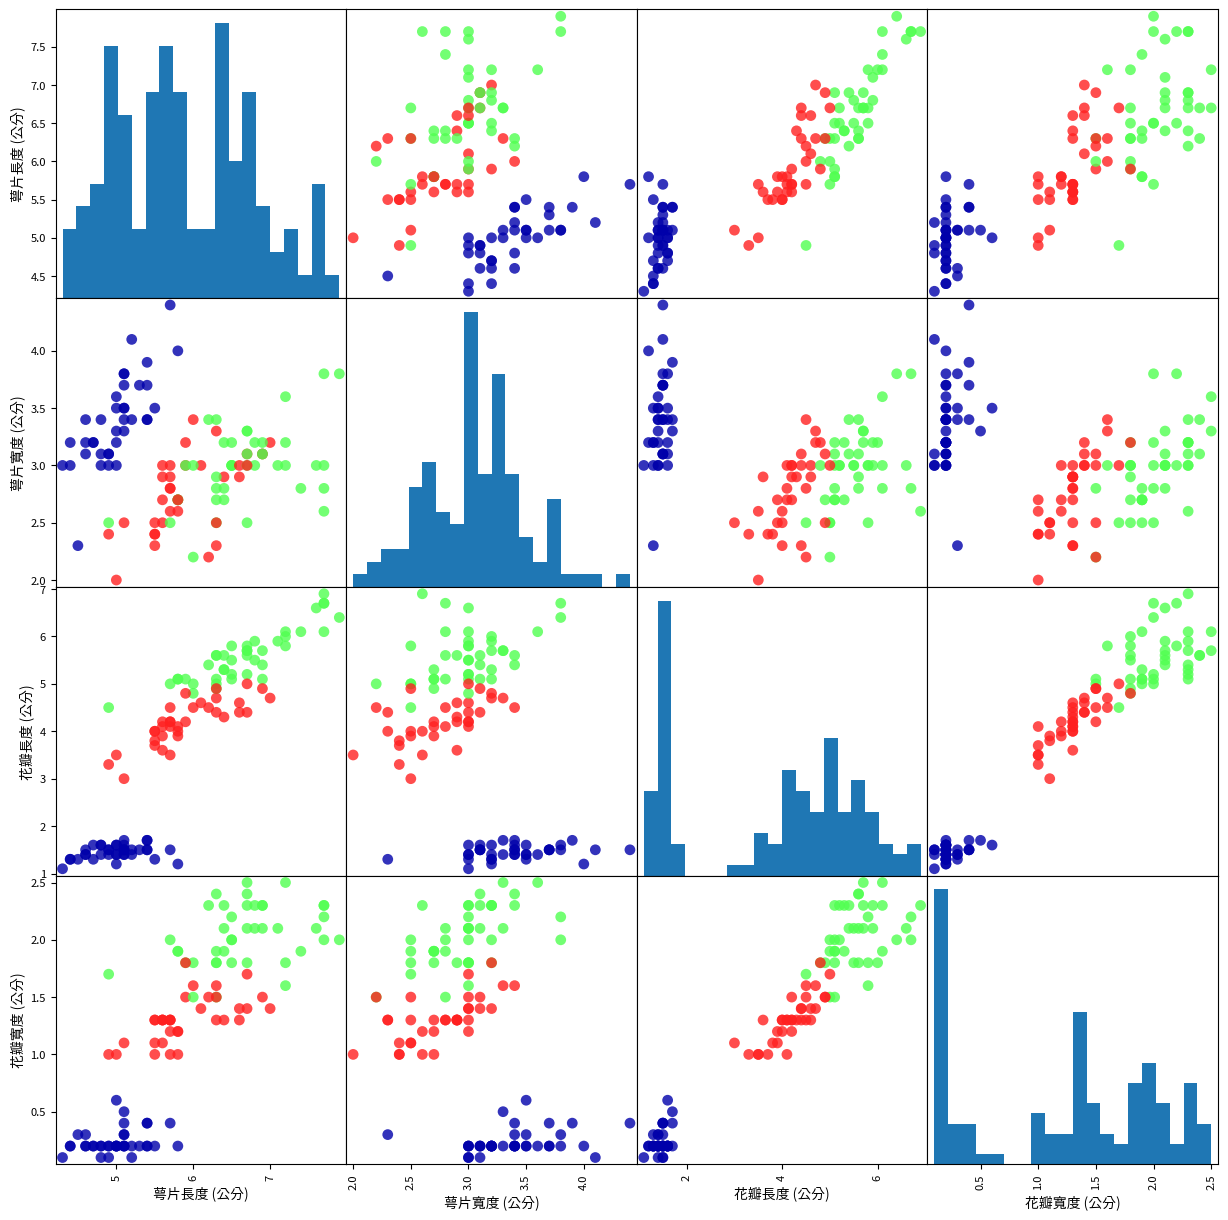

In [24]:
#create a scatter matrix from the dataframe, color by y_train
from pandas.plotting import scatter_matrix
import mglearn
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

- 從圖中我們可以看出，透過萼片和花瓣測量，這三個類別似乎可以相對較好地分離。

### 4. 建立第一個模型:(近鄰演算法 K-Nearest Neighbors[KNN])

> - 開始建立實際的機器學習模型。scikit-learn 中有很多分類演算法可供我們使用。這裡我們將使用很容易理解的 k-nearest neighbors。  
> - k 最近鄰中的 k 表示我們不只是使用距離新資料點最近的鄰居，而是可以在訓練中考慮任意固定數量的 k 個鄰居（例如，最近的三個或五個鄰居）。
然後，我們可以使用這些鄰居中的多數類別進行預測。  
> - 這個範例將只使用一個鄰居。  



In [25]:
from sklearn.neighbors import KNeighborsClassifier
#建立模型
knn = KNeighborsClassifier(n_neighbors=1)
#訓練模型
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### 5. 建立預測

In [26]:
#建立要預測的資訊
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [27]:
#預測資料
prediction = knn.predict(X_new)
print("預測的數值: {}".format(prediction))
print("轉換為預測的名稱: {}".format(iris_dataset['target_names'][prediction[0]]))

預測的數值: [0]
轉換為預測的名稱: 山鳶尾


### 6. 評估模型

In [28]:
y_pred = knn.predict(X_test)
print("X_test一組的預測值:\n {}".format(y_pred))

X_test一組的預測值:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [29]:
#使用ndarray評估
print("模型評估分數為:{:.2f}".format(np.mean(y_pred == y_test)))

模型評估分數為:0.97


In [30]:
#使用knn評估
print("模型評估分數為:{:.2f}".format(knn.score(X_test, y_test)))

模型評估分數為:0.97
